In [23]:
from sklearn.model_selection import KFold
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold,StratifiedKFold

In [24]:
dataframe = pd.read_csv('diabetes.csv')
dataframe

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [25]:
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [27]:
X = dataframe.iloc[:,0:8]
Y = dataframe.iloc[:,8]
kfold = StratifiedKFold(n_splits = 10,random_state = 2099,shuffle = True)
model = RandomForestClassifier(n_estimators =200,random_state = 20,max_depth = None)
results = cross_val_score(model,X,Y,cv = kfold)
print(results)
print(results.mean())

[0.77922078 0.79220779 0.80519481 0.67532468 0.80519481 0.7012987
 0.75324675 0.79220779 0.73684211 0.76315789]
0.7603896103896105


#### BOOTSTRAP: Random selection with replacement

#### Hyper parameter tuning using GridSearchCV

In [28]:
# Use Grid Search CV to find best parameters(Hyper parameter tuning)
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier(random_state = 42,n_jobs = -1)
params = {
    'max_depth':[2,3,5,None],
    'min_samples_leaf':[5,10,20],
    'n_estimators':[50,100,200,500],
    'max_features':["sqrt","log2",None],
    'criterion':["gini","entropy"]
}
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf,
                           param_grid = params,
                           cv = 5,
                           n_jobs = -1,scoring = "accuracy")
grid_search.fit(X,Y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, None],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [5, 10, 20],
                         'n_estimators': [50, 100, 200, 500]},
             scoring='accuracy')

In [29]:
print(grid_search.best_params_)
print(grid_search.best_score_)


{'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 5, 'n_estimators': 100}
0.7826160767337238


In [30]:
grid_search.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=5, max_features=None,
                       min_samples_leaf=5, n_jobs=-1, random_state=42)

#### Feature selection using Random Forest

In [31]:
# Use best estimator hyper parameters obtained above to select important features
model_best = RandomForestClassifier(criterion = 'entropy',max_depth = 5,
                                    max_features = None,
                                   min_samples_leaf = 5,n_jobs =-1,random_state = 42)
model_best.fit(X,Y)
model_best.feature_importances_

array([0.04279647, 0.44093393, 0.0396377 , 0.0225074 , 0.0251669 ,
       0.21364299, 0.08380487, 0.13150974])

In [33]:
df = pd.DataFrame(model_best.feature_importances_,
                 columns = ['Importance score'],index = X.columns)
df.sort_values(by = 'Importance score',inplace = True,ascending = False)


<BarContainer object of 8 artists>

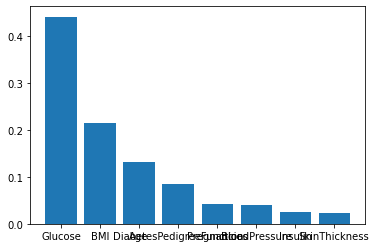

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.bar(df.index,df['Importance score'])